# Assignment

For this assignment you will start from the perceptron neural network notebook we introduced in the lecture, and modify the python code to make it into a multi-layer neural network classifier. To test your system, use the `wine.csv` data with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

1. Load the `wine.csv` data and prepare the data for analysis: Split the data into training and testing and normalize the features. <span style="color:red" float:right>[3 point]</span>
1. Train a logistic regression classifier to predict the type of wine (red vs. white). Report the accuracy of the model. <span style="color:red" float:right>[5 point]</span>
1. Train a multi-layer feed-forward neural network to predict the type of wine. You network should have one hidden layer. You are free to choose how many neurons you want in the hidden layer. <span style="color:red" float:right>[15 point]</span>
1. Tune your neural network by trying different values for the learning rate and the number of neurons in the hidden layer. <span style="color:red" float:right>[10 point]</span>
1. Report the accuracy of the best model you obtained in the previous step. <span style="color:red" float:right>[5 point]</span>

Determine what the best neural network structure and hyperparameter settings results in the best predictive capability

In [35]:
#Step 1 - load the wine dataset, and prepare data for analysis - split the data into training and testing and normalize the features
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('wine.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [36]:
df.Class.value_counts()

0    4898
1    1599
Name: Class, dtype: int64

- Going to assume that 0 is red and 1 is white

In [37]:
#There is a class imbalance issue - will undersample the 0 to get an even playing field
wine_0 = df[df['Class']==0]
wine_1 = df[df['Class']==1]
print(len(wine_0))
print(len(wine_1))

4898
1599


In [38]:
#Taking random samples from wine_0 and reshaping to len of wine_1
wine_0 = wine_0.sample(n=len(wine_1))
wine_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 6160 to 2375
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Class                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 174.9 KB


In [39]:
frames = [wine_0, wine_1]
wine_df = pd.concat(frames)
wine_df.Class.value_counts()

0    1599
1    1599
Name: Class, dtype: int64

In [40]:
X = wine_df.drop(columns=['Class'])
y = wine_df.Class
X_nc = df.drop(columns=['Class'])
y_nc = df.Class

In [41]:
X_normalized = (X-X.mean())/X.std()
#X_normalized.head()
X_normalized_nc = (X_nc - X_nc.mean())/X_nc.std()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=.25, random_state=13)
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_normalized_nc, y_nc, test_size=.25, random_state=13)
print('Training set size for X - {}'.format(X_train.shape))
print('Train set size for y that is not balanced - {}'.format(y_train_nc.shape))

Training set size for X - (2398, 12)
Train set size for y that is not balanced - (4872,)


In [43]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
959,0.270338,0.978989,-1.525753,-0.581201,0.532744,-0.792626,-1.020782,0.706696,0.673327,0.214408,-0.415730,-0.903384
192,-0.499112,1.188512,-1.102848,-0.141629,0.770421,-0.559572,0.569633,0.548818,0.183704,0.214408,-0.847358,-0.903384
1429,0.206217,-1.168628,0.588772,-0.532359,-0.417964,0.722229,-0.428607,0.233063,0.489719,2.132552,0.706501,-0.903384
1153,1.296271,0.088514,0.286697,-0.556780,0.390138,-0.501308,-0.919266,0.310247,-0.122310,0.514118,0.533850,0.269109
891,-0.242628,1.345655,-1.646583,-0.507939,0.271300,-0.559572,-0.107140,0.734763,1.713776,-0.025360,-0.674707,-0.903384


2. Train a logistic regression classifier to predict the type of wine (red vs. white). Report the accuracy of the model. <span style="color:red" float:right>[5 point]</span>

In [44]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_hat = log_reg.predict(X_test)

accuracy_score(y_test, y_hat)

0.99375

In [45]:
confusion_matrix(y_test, y_hat)

array([[400,   1],
       [  4, 395]], dtype=int64)

In [46]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])

True Negatives:  400
False Positives:  1
False Negatives:  4
True Positives:  395


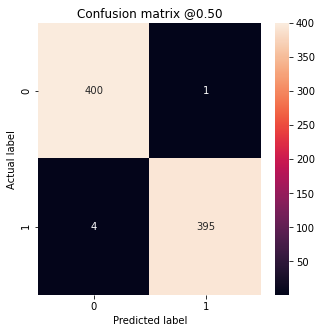

In [47]:
plot_cm(y_test, y_hat)

In [48]:
#Will now look at the results with the unbalanced data
log_reg.fit(X_train_nc, y_train_nc)
y_hat = log_reg.predict(X_test_nc)

accuracy_score(y_test_nc, y_hat)

0.9969230769230769

In [49]:
confusion_matrix(y_test_nc, y_hat)

array([[1208,    4],
       [   1,  412]], dtype=int64)

True Negatives:  1208
False Positives:  4
False Negatives:  1
True Positives:  412


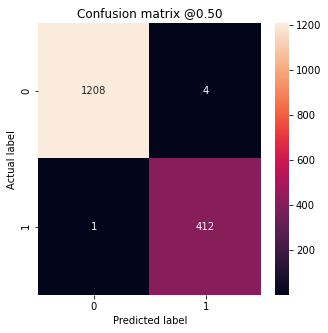

In [50]:
plot_cm(y_test_nc, y_hat)

3. Train a multi-layer feed-forward neural network to predict the type of wine. You network should have one hidden layer. You are free to choose how many neurons you want in the hidden layer. <span style="color:red" float:right>[15 point]</span>

Sources and Scratch
- https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a

First half of block of code is manual TF layers - second half is the mlp classifier

import tensorflow as tf
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

#Step 1 - Specify the structure
model = Sequential(name='model_one_input')#groups layers into a tf.keras.model
model.add(Input(shape=(12,), name='input_layer'))
model.add(Dense(2, activation='relu', name='hidden_layer'))
model.add(Dense(1, activation='sigmoid', name='outer_layer'))

#Step 2 - Compile Keras Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy', 'Precision', 'Recall'],
             loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None)

#Step 3 - fit keras model on dataset
model.fit(X_train, y_train, batch_size=10, epochs=10, 
         verbose='auto')

#Step 4. Use model to make predictions
pred_labels_tr = (model.predict(X_train) >0.5).astype(int)
pred_labels_ts = (model.predict(X_test) >0.5).astype(int)

#Step 5 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_ts))
print("")

In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1,),#represents the number of hidden neurons
                   activation='relu',
                   solver='lbfgs',
                   random_state=13,
                   max_iter=100).fit(X_train, y_train)

In [52]:
y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.99125

In [53]:
accuracy_score(y_test, y_pred)

0.99125

4. Tune your neural network by trying different values for the learning rate and the number of neurons in the hidden layer. <span style="color:red" float:right>[10 point]</span>

Scratch and Notes
- Same format as above - top part is scratch and building out on my own, below is mlp classifier

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]


model.fit(X_train, y_train, batch_size=10, epochs=10, 
         verbose='auto', callbacks=my_callbacks)

#Step 1 - Specify the structure
model = Sequential(name='model_one_input')#groups layers into a tf.keras.model
model.add(Input(shape=(12,), name='input_layer'))
model.add(Dense(3, activation='relu', name='hidden_layer'))
model.add(Dense(2, activation='sigmoid', name='outer_layer'))
model.add(Dense(1, activation='relu', name='hidden_layer_2'))#Adding a new hidden layer

#Step 2 - Compile Keras Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy', 'Precision', 'Recall'])

#Step 3 - fit keras model on dataset
model.fit(X_train, y_train, batch_size=10, epochs=10, 
         verbose='auto')

#Step 4. Use model to make predictions
pred_labels_tr = (model.predict(X_train) >0.5).astype(int)
pred_labels_ts = (model.predict(X_test) >0.5).astype(int)

#Step 5 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_ts))
print("")

In [54]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(10,5),#represents the number of hidden neurons
                   activation='relu',
                   solver='lbfgs',
                   learning_rate='adaptive',
                   random_state=13,
                   max_iter=100).fit(X_train, y_train)

C:\Users\7w9\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [55]:
y_pred = mlp_2.predict(X_test)

mlp_2.score(X_test, y_test)

0.99

In [56]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(10,5),#represents the number of hidden neurons
                   activation='relu',
                   solver='lbfgs',
                   learning_rate='invscaling',
                   random_state=13,
                   max_iter=100).fit(X_train, y_train)

C:\Users\7w9\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [57]:
y_pred = mlp_3.predict(X_test)

mlp_3.score(X_test, y_test)

0.99

5. Report the accuracy of the best model you obtained in the previous step. <span style="color:red" float:right>[5 point]</span>

Seems that both models were overfitting? Getting 98% accuracy is incredibly high and I am a little concerned that even when I changed the learning rate and number of layers and learning rate, it was still 99 - any thoughts on this??